In [1]:
import cv2
import pandas as pd
import os
import shutil
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv("annotations.csv")

In [3]:
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,maksssksksss0.png,512,366,without_mask,79,105,109,142
1,maksssksksss0.png,512,366,with_mask,185,100,226,144
2,maksssksksss0.png,512,366,without_mask,325,90,360,141
3,maksssksksss1.png,400,156,with_mask,321,34,354,69
4,maksssksksss1.png,400,156,with_mask,224,38,261,73
...,...,...,...,...,...,...,...,...
4067,maksssksksss98.png,400,267,with_mask,263,62,287,85
4068,maksssksksss98.png,400,267,with_mask,344,80,377,106
4069,maksssksksss99.png,400,267,mask_weared_incorrect,181,54,273,162
4070,maksssksksss99.png,400,267,with_mask,99,87,176,165


In [4]:
if os.path.exists('./Kaggle-MaskDetection/cropped'):
    shutil.rmtree('./Kaggle-MaskDetection/cropped')

if not os.path.exists('./Kaggle-MaskDetection/cropped'):
    os.makedirs('./Kaggle-MaskDetection/cropped')

In [5]:
def save_cropped_image(index, row):
    img = cv2.imread(f"./Kaggle-MaskDetection/images/{row['filename']}")
    crop_img = img[row['ymin']:row['ymax'], row['xmin']:row['xmax']]
    resized_img = cv2.resize(crop_img, (224,224))
    if not os.path.exists(f"./Kaggle-MaskDetection/cropped/{row['class']}"):
        os.makedirs(f"./Kaggle-MaskDetection/cropped/{row['class']}")
    cv2.imwrite(f"./Kaggle-MaskDetection/cropped/{row['class']}/{index}-{row['filename']}", resized_img)

In [6]:
for index, row in df.iterrows():
    save_cropped_image(index,row)

In [7]:
data_dir = f"./Kaggle-MaskDetection/cropped"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=100)


Found 4072 files belonging to 3 classes.
Using 3258 files for training.


In [8]:
train_ds

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

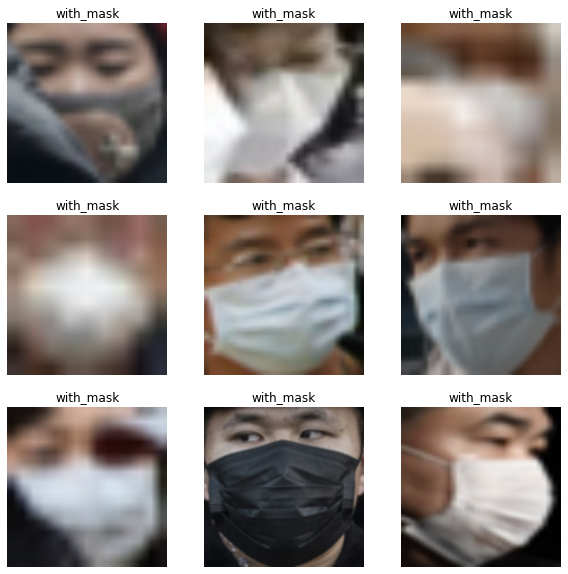

In [9]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(100, 224, 224, 3)
(100,)


In [11]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)